In [21]:
import cv2
import numpy as np

img = cv2.imread("../Input/TH1/dark.png")

s = 128
img = cv2.resize(img, (s, s), 0, 0, cv2.INTER_AREA)


def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


font = cv2.FONT_HERSHEY_SIMPLEX
fcolor = (0, 0, 0)

# blist = [0, -127, 127, 0, 0, 64]  # list of brightness values
# clist = [0, 0, 0, -64, 64, 64]  # list of contrast values

blist = [0, 0]
clist = [0, -16]

out = np.zeros((s * 1, s * 2, 3), dtype=np.uint8)

for i, b in enumerate(blist):
    c = clist[i]
    print("b, c:  ", b, ", ", c)
    row = s * int(i / 3)
    col = s * (i % 3)

    print("row, col:   ", row, ", ", col)

    out[row : row + s, col : col + s] = apply_brightness_contrast(img, b, c)
    msg = "b %d" % b
    cv2.putText(out, msg, (col, row + s - 22), font, 0.7, fcolor, 1, cv2.LINE_AA)
    msg = "c %d" % c
    cv2.putText(out, msg, (col, row + s - 4), font, 0.7, fcolor, 1, cv2.LINE_AA)

cv2.imwrite("../Output/TH1/out.png", out)


b, c:   0 ,  0
row, col:    0 ,  0
b, c:   0 ,  -16
row, col:    0 ,  128


True

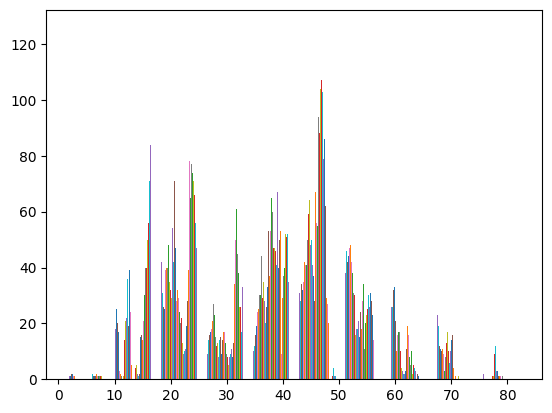

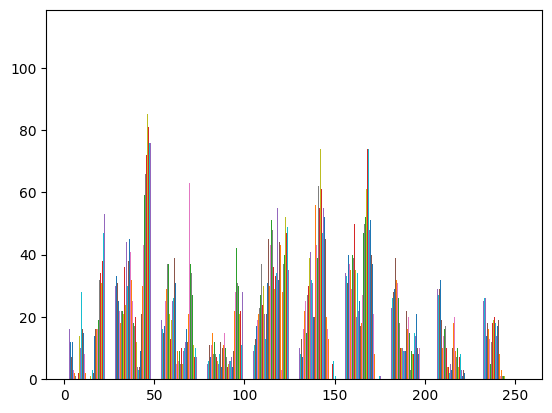

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../Input/TH1/dark.png")
img = cv2.resize(img, (200, 200))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
matrix = np.array(gray_img)
plt.hist(matrix)
plt.show()

for i in range(0, matrix.shape[0]):
    for j in range(1, matrix.shape[1]):
        if matrix[i][j] < 10:
            matrix[i][j] = 0
        elif matrix[i][j] <=70:
            matrix [i][j] = 255 * (matrix[i][j] - 10) / (70 - 10)
        else:
            matrix[i][j] = 255

plt.hist(matrix)
plt.show()